In [1]:
import ImageView: imshow
import Images: Gray
import TestImages: testimage

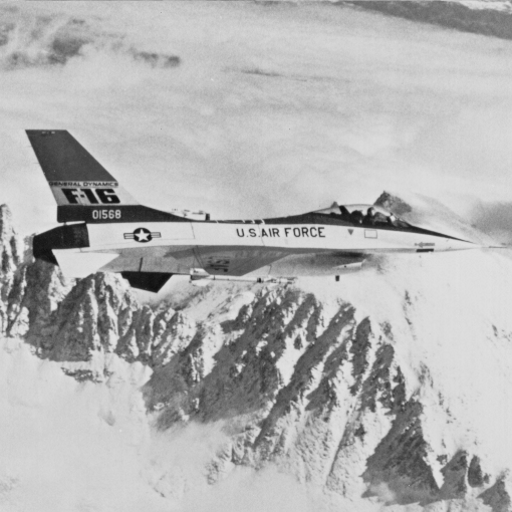

In [2]:
j = 1*Gray.(testimage("jetplane"))

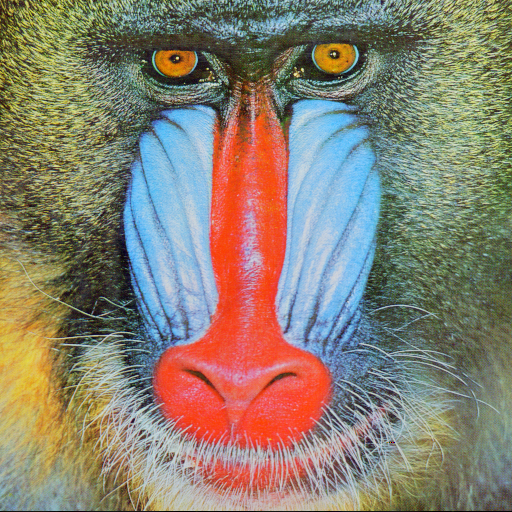

In [3]:
m = 1*testimage("mandrill")

In [6]:
typeof(j), typeof(m)

(Matrix{Gray{Float32}}, Matrix{ColorTypes.RGB{Float32}})

In [7]:
import Images: channelview

In [8]:
function decompose_color_image(img)
    ch = channelview(img)
    return (ch[1,:,:], ch[2,:,:], ch[3,:,:])
end

decompose_color_image (generic function with 1 method)

In [9]:
c = decompose_color_image(m)

(Float32[0.6431373 0.24705882 … 0.5529412 0.7019608; 0.47058824 0.5294118 … 0.53333336 0.47058824; … ; 0.49411765 0.45882353 … 0.3882353 0.3137255; 0.03529412 0.039215688 … 0.007843138 0.015686275], Float32[0.5882353 0.22352941 … 0.6666667 0.7372549; 0.49019608 0.38039216 … 0.62352943 0.5411765; … ; 0.6627451 0.5921569 … 0.27058825 0.24705882; 0.043137256 0.047058824 … 0.019607844 0.019607844], Float32[0.2784314 0.12156863 … 0.39607844 0.4627451; 0.24313726 0.12941177 … 0.5019608 0.2901961; … ; 0.65882355 0.5921569 … 0.3372549 0.2784314; 0.047058824 0.043137256 … 0.0 0.007843138])

In [13]:
grays = map(x->Gray.(x), c)

(Gray{Float32}[Gray{Float32}(0.6431373f0) Gray{Float32}(0.24705882f0) … Gray{Float32}(0.5529412f0) Gray{Float32}(0.7019608f0); Gray{Float32}(0.47058824f0) Gray{Float32}(0.5294118f0) … Gray{Float32}(0.53333336f0) Gray{Float32}(0.47058824f0); … ; Gray{Float32}(0.49411765f0) Gray{Float32}(0.45882353f0) … Gray{Float32}(0.3882353f0) Gray{Float32}(0.3137255f0); Gray{Float32}(0.03529412f0) Gray{Float32}(0.039215688f0) … Gray{Float32}(0.007843138f0) Gray{Float32}(0.015686275f0)], Gray{Float32}[Gray{Float32}(0.5882353f0) Gray{Float32}(0.22352941f0) … Gray{Float32}(0.6666667f0) Gray{Float32}(0.7372549f0); Gray{Float32}(0.49019608f0) Gray{Float32}(0.38039216f0) … Gray{Float32}(0.62352943f0) Gray{Float32}(0.5411765f0); … ; Gray{Float32}(0.6627451f0) Gray{Float32}(0.5921569f0) … Gray{Float32}(0.27058825f0) Gray{Float32}(0.24705882f0); Gray{Float32}(0.043137256f0) Gray{Float32}(0.047058824f0) … Gray{Float32}(0.019607844f0) Gray{Float32}(0.019607844f0)], Gray{Float32}[Gray{Float32}(0.2784314f0) Gray{

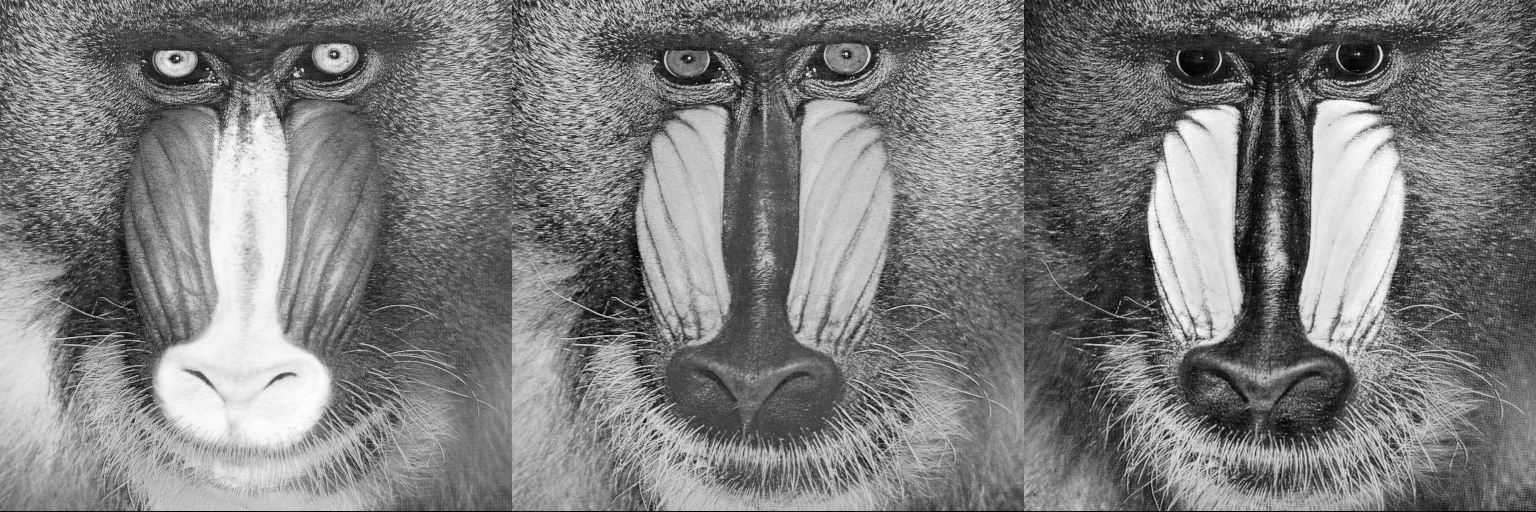

In [15]:
hcat(grays[1], grays[2], grays[3])

In [19]:
import Images: RGB

In [21]:
typeof(RGB.(j))

Matrix{RGB{Float32}} (alias for Array{RGB{Float32}, 2})

In [25]:
function colorize(gray_img, c = 1)
    new_img = RGB.(deepcopy(gray_img))
    new_img .= 0 # make it black
    channelview(new_img)[c,:,:] = gray_img
    new_img
end

colorize (generic function with 2 methods)

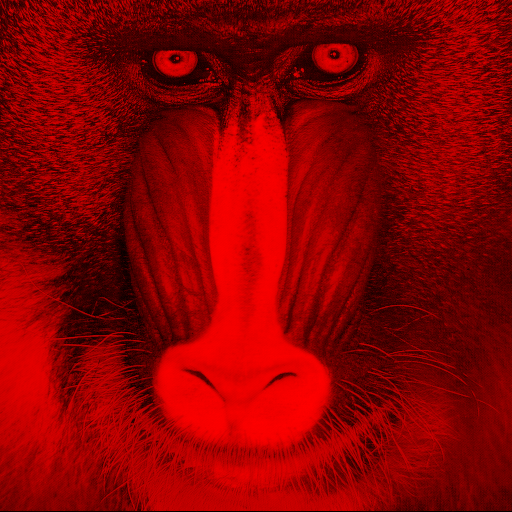

In [26]:
colorize(grays[1])

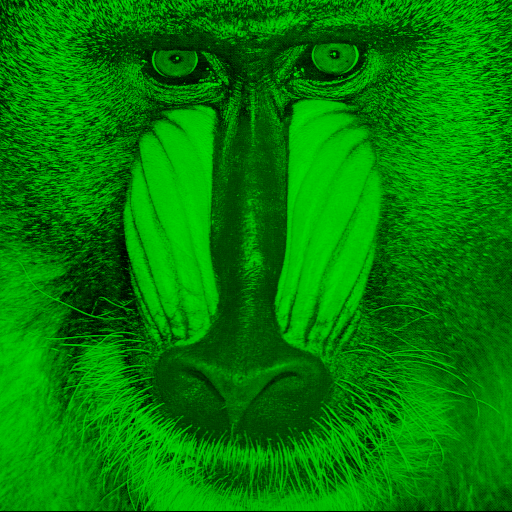

In [27]:
colorize(grays[2], 2)

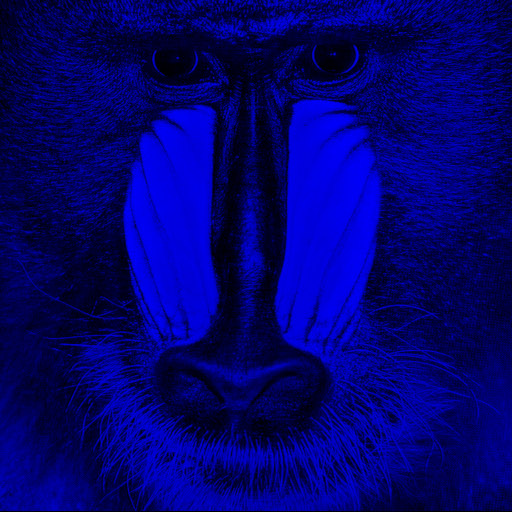

In [28]:
colorize(grays[3], 3)

In [32]:
function create_colored(img_red, img_green, img_blue)
    new_img = RGB.(deepcopy(img_red))
    new_img .= 0 # make it black
    channelview(new_img)[1,:,:] = img_red
    channelview(new_img)[2,:,:] = img_green
    channelview(new_img)[3,:,:] = img_blue
    new_img
end 

create_colored (generic function with 1 method)

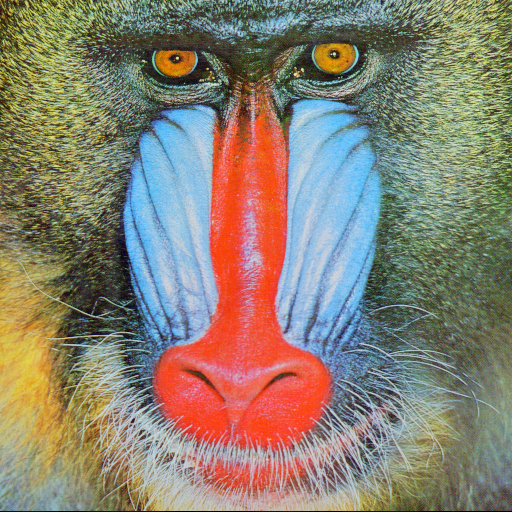

In [34]:
create_colored(grays...)

In [36]:
import LinearAlgebra: transpose

In [37]:
function normalize_image(im)
    im_res = im .- minimum(im)
    return (1/maximum(im_res))*im_res
end

normalize_image (generic function with 1 method)

In [38]:
matr_j = convert(Matrix{Float32}, j)

512×512 Matrix{Float32}:
 0.756863  0.72549   0.698039  0.721569  …  0.647059  0.643137  0.576471
 0.74902   0.764706  0.760784  0.745098     0.698039  0.611765  0.545098
 0.756863  0.772549  0.760784  0.74902      0.745098  0.611765  0.54902
 0.733333  0.72549   0.72549   0.698039     0.819608  0.745098  0.643137
 0.701961  0.701961  0.698039  0.709804     0.815686  0.807843  0.72549
 0.678431  0.694118  0.694118  0.690196  …  0.780392  0.811765  0.776471
 0.694118  0.682353  0.670588  0.705882     0.666667  0.74902   0.768627
 0.666667  0.65098   0.658824  0.686275     0.6       0.67451   0.745098
 0.666667  0.643137  0.666667  0.647059     0.654902  0.698039  0.760784
 0.666667  0.666667  0.666667  0.654902     0.666667  0.705882  0.768627
 0.705882  0.690196  0.698039  0.67451   …  0.596078  0.65098   0.686275
 0.721569  0.682353  0.686275  0.662745     0.627451  0.654902  0.678431
 0.694118  0.721569  0.698039  0.713726     0.67451   0.737255  0.733333
 ⋮                          

In [39]:
matr_grays = map(x->convert(Matrix{Float32}, x), grays)

(Float32[0.6431373 0.24705882 … 0.5529412 0.7019608; 0.47058824 0.5294118 … 0.53333336 0.47058824; … ; 0.49411765 0.45882353 … 0.3882353 0.3137255; 0.03529412 0.039215688 … 0.007843138 0.015686275], Float32[0.5882353 0.22352941 … 0.6666667 0.7372549; 0.49019608 0.38039216 … 0.62352943 0.5411765; … ; 0.6627451 0.5921569 … 0.27058825 0.24705882; 0.043137256 0.047058824 … 0.019607844 0.019607844], Float32[0.2784314 0.12156863 … 0.39607844 0.4627451; 0.24313726 0.12941177 … 0.5019608 0.2901961; … ; 0.65882355 0.5921569 … 0.3372549 0.2784314; 0.047058824 0.043137256 … 0.0 0.007843138])

In [45]:
mults = map(x->Gray.(normalize_image(matr_j*x)), matr_grays)

(Gray{Float32}[Gray{Float32}(0.44740984f0) Gray{Float32}(0.43969104f0) … Gray{Float32}(0.22862545f0) Gray{Float32}(0.23093118f0); Gray{Float32}(0.4255996f0) Gray{Float32}(0.41720647f0) … Gray{Float32}(0.23096749f0) Gray{Float32}(0.2331433f0); … ; Gray{Float32}(0.59328f0) Gray{Float32}(0.58393794f0) … Gray{Float32}(0.3349459f0) Gray{Float32}(0.3387374f0); Gray{Float32}(0.59255207f0) Gray{Float32}(0.5832427f0) … Gray{Float32}(0.3344812f0) Gray{Float32}(0.3383288f0)], Gray{Float32}[Gray{Float32}(0.6020888f0) Gray{Float32}(0.59762776f0) … Gray{Float32}(0.4737066f0) Gray{Float32}(0.48781452f0); Gray{Float32}(0.5799326f0) Gray{Float32}(0.57425153f0) … Gray{Float32}(0.48112354f0) Gray{Float32}(0.49557796f0); … ; Gray{Float32}(0.7894932f0) Gray{Float32}(0.78353626f0) … Gray{Float32}(0.64743465f0) Gray{Float32}(0.6634006f0); Gray{Float32}(0.78848094f0) Gray{Float32}(0.782549f0) … Gray{Float32}(0.64686143f0) Gray{Float32}(0.662669f0)], Gray{Float32}[Gray{Float32}(0.21896145f0) Gray{Float32}(0.22

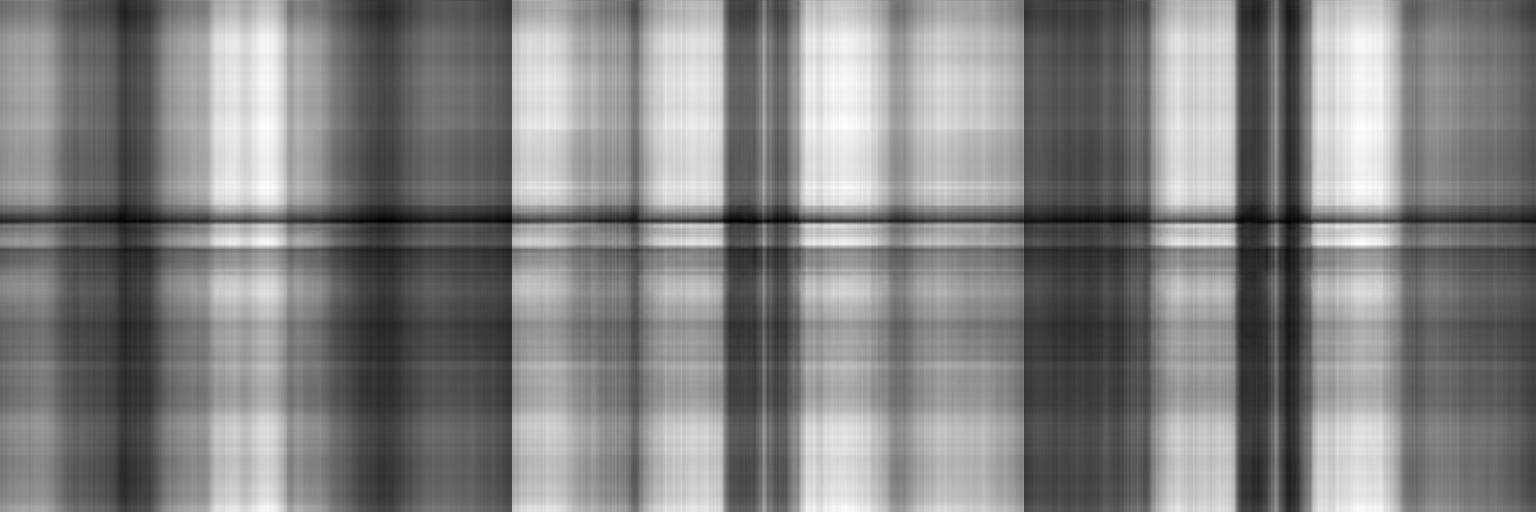

In [47]:
hcat(mults...)

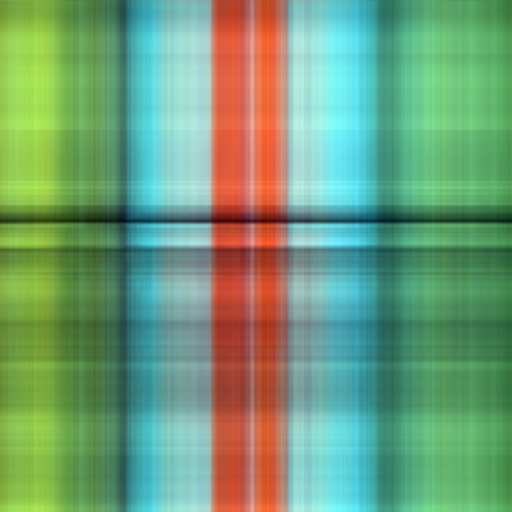

In [48]:
create_colored(mults...)

In [49]:
norm_columns(f, x) = f.(x) ./ sum(f.(x), dims=1)

norm_rows(f, x) = f.(x) ./ sum(f.(x), dims=2)

norm_rows (generic function with 1 method)

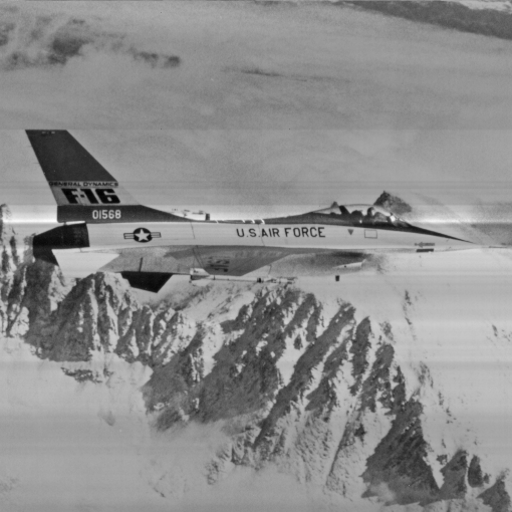

In [53]:
n_matr_j = normalize_image(norm_rows(x->x+1, matr_j))
Gray.(n_matr_j)

In [54]:
n_matr_grays = map(y->normalize_image(norm_columns(x -> x+1, y)), matr_grays)

(Float32[0.63830155 0.30048746 … 0.7073129 0.8475436; 0.489521 0.5447855 … 0.68855256 0.6264922; … ; 0.5098093 0.48371097 … 0.5497271 0.47662684; 0.114188135 0.12065688 … 0.18577898 0.1918826], Float32[0.5615961 0.24128003 … 0.6935911 0.75125897; 0.47505143 0.37996045 … 0.65388703 0.57161057; … ; 0.62737 0.567179 … 0.32903615 0.3021377; 0.08040785 0.08526457 … 0.09803111 0.0937454], Float32[0.4120449 0.2763915 … 0.49336076 0.5455142; 0.38195542 0.28306454 … 0.5821894 0.4012018; … ; 0.73634213 0.6767774 … 0.44401142 0.39136234; 0.21479179 0.20966047 … 0.16107567 0.16505417])

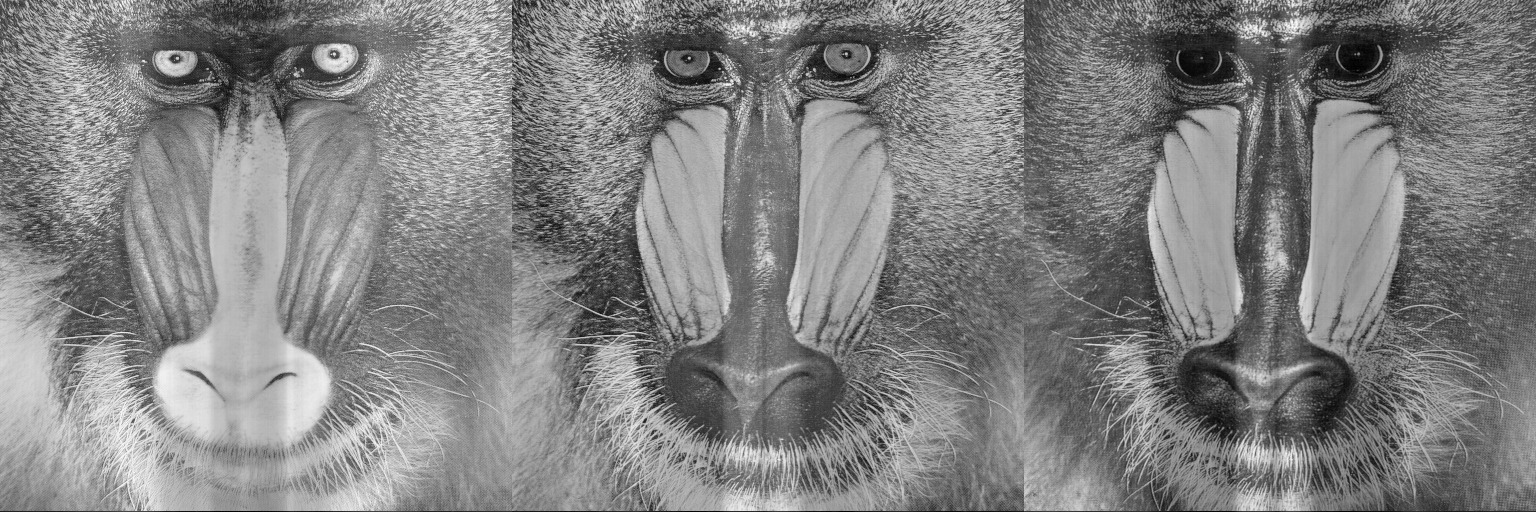

In [57]:
hcat(map(x->Gray.(x), n_matr_grays)...)

In [58]:
n_mults = map(x->Gray.(normalize_image(n_matr_j*x)), n_matr_grays)

(Gray{Float32}[Gray{Float32}(0.43819892f0) Gray{Float32}(0.43795392f0) … Gray{Float32}(0.45434088f0) Gray{Float32}(0.44992912f0); Gray{Float32}(0.24398556f0) Gray{Float32}(0.23913983f0) … Gray{Float32}(0.42951426f0) Gray{Float32}(0.42400703f0); … ; Gray{Float32}(0.44458756f0) Gray{Float32}(0.44280723f0) … Gray{Float32}(0.45892003f0) Gray{Float32}(0.4613607f0); Gray{Float32}(0.44622672f0) Gray{Float32}(0.44459572f0) … Gray{Float32}(0.4606986f0) Gray{Float32}(0.46354467f0)], Gray{Float32}[Gray{Float32}(0.4523797f0) Gray{Float32}(0.45409152f0) … Gray{Float32}(0.45886877f0) Gray{Float32}(0.4598705f0); Gray{Float32}(0.2718891f0) Gray{Float32}(0.26684266f0) … Gray{Float32}(0.4479179f0) Gray{Float32}(0.4501772f0); … ; Gray{Float32}(0.41945776f0) Gray{Float32}(0.41766044f0) … Gray{Float32}(0.47459546f0) Gray{Float32}(0.4721301f0); Gray{Float32}(0.42109388f0) Gray{Float32}(0.41939467f0) … Gray{Float32}(0.47784102f0) Gray{Float32}(0.47459826f0)], Gray{Float32}[Gray{Float32}(0.4674166f0) Gray{Flo

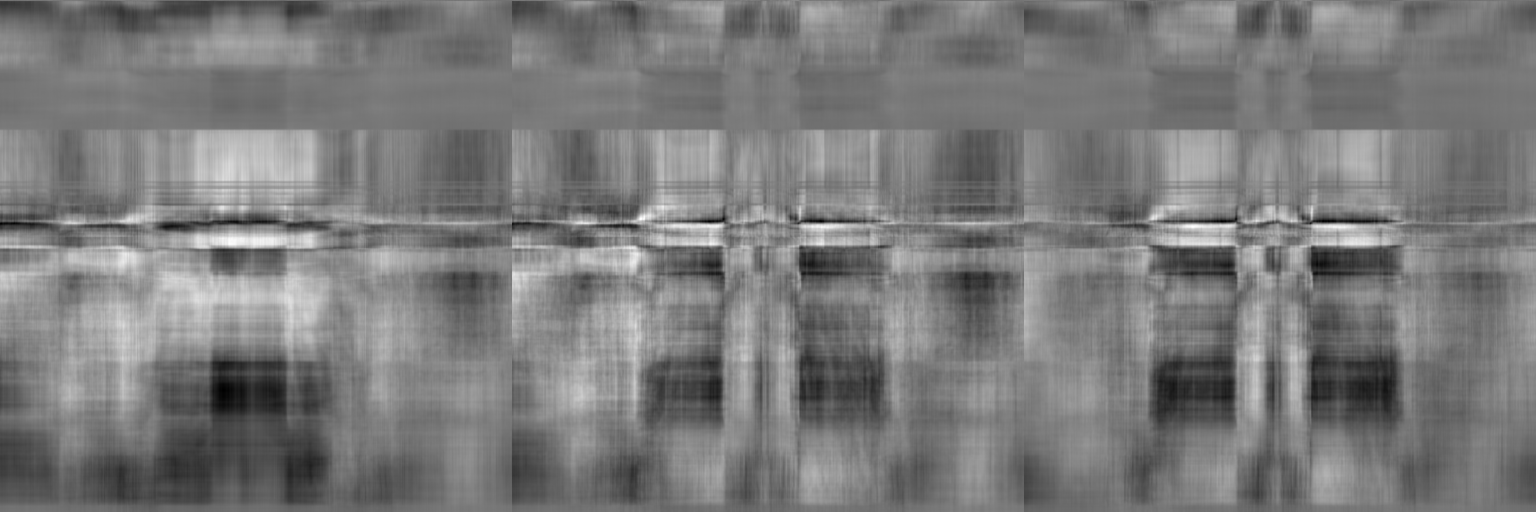

In [59]:
hcat(n_mults...)

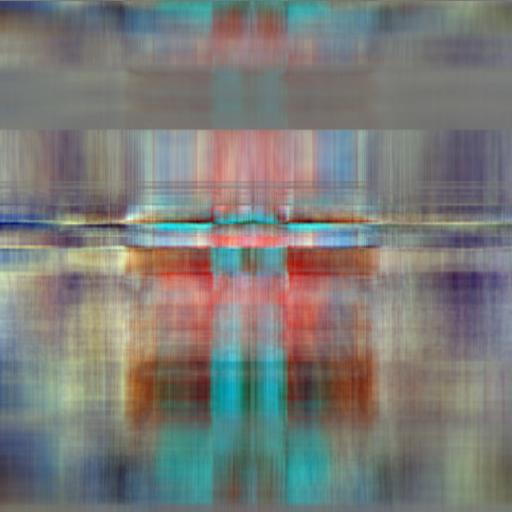

In [61]:
create_colored(n_mults...)